# Graduate Rotational Internship Program of **The Sparks Foundation**
<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TASK-4:- To Explore Decision Tree Algorithm

<b>------------------------------------------------------------------------------------------------------</b>

##  Problem statement

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.


## Objective

Creating Decision Tree classifier and visualizing graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

### A) Import all required Libraries

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import statistics as st
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Read the data from the link of the data as below

In [7]:
iris = pd.read_csv("iris.csv")
print("Data Loaded Successfully")

Data Loaded Successfully


In [9]:
#Printing the first 5 rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [11]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


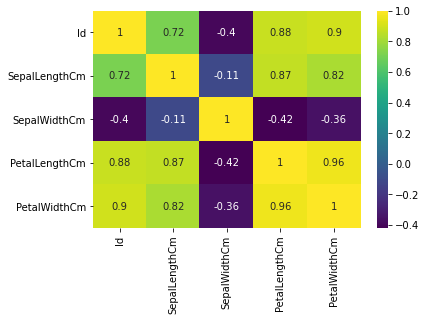

In [17]:
corr = iris.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='viridis',annot=True)
plt.show()

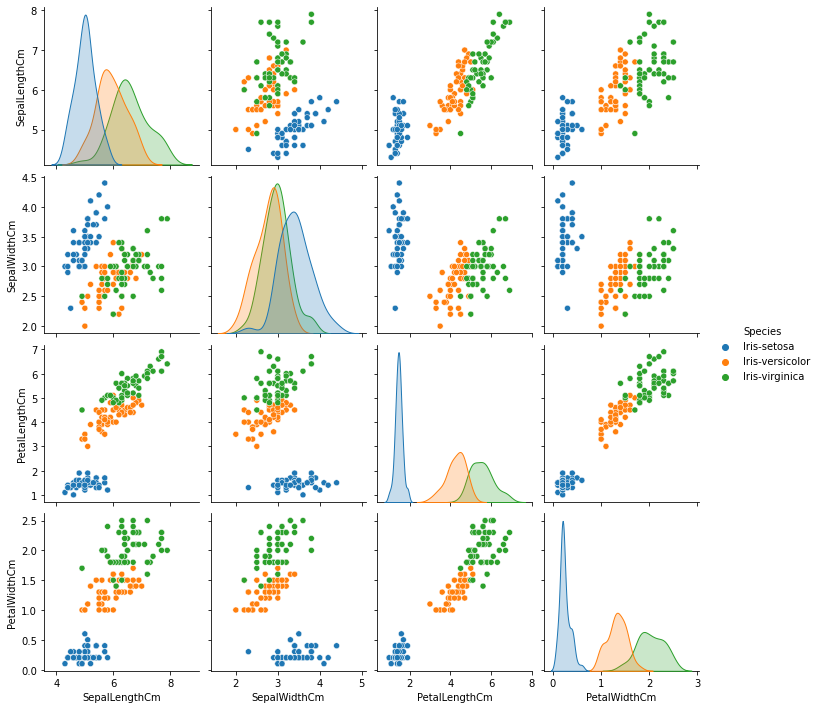

In [18]:
sns.pairplot(iris.iloc[:,[1,2,3,4,5]],hue='Species')

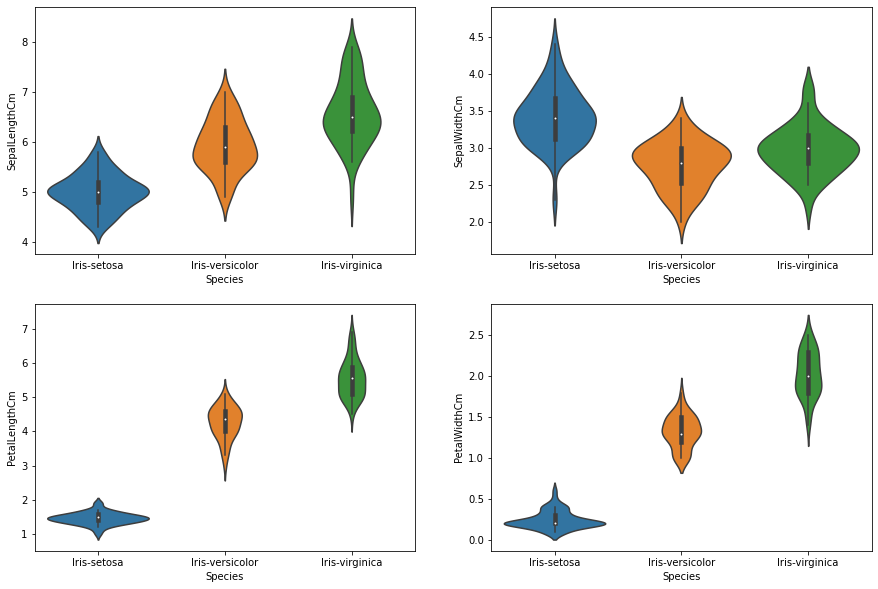

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm', data=iris)
plt.show()

### B) Preparing the data

In [20]:
X, y = iris.iloc[ : , 1: -1], iris.iloc[ : , -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0, shuffle = True, test_size = 0.2)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


### C) Constructing the Decision Tree

In [26]:
treeModel = DecisionTreeClassifier(max_depth = 6)   
treeModel.fit(X_train, y_train)
y_preds = treeModel.predict(X_val)

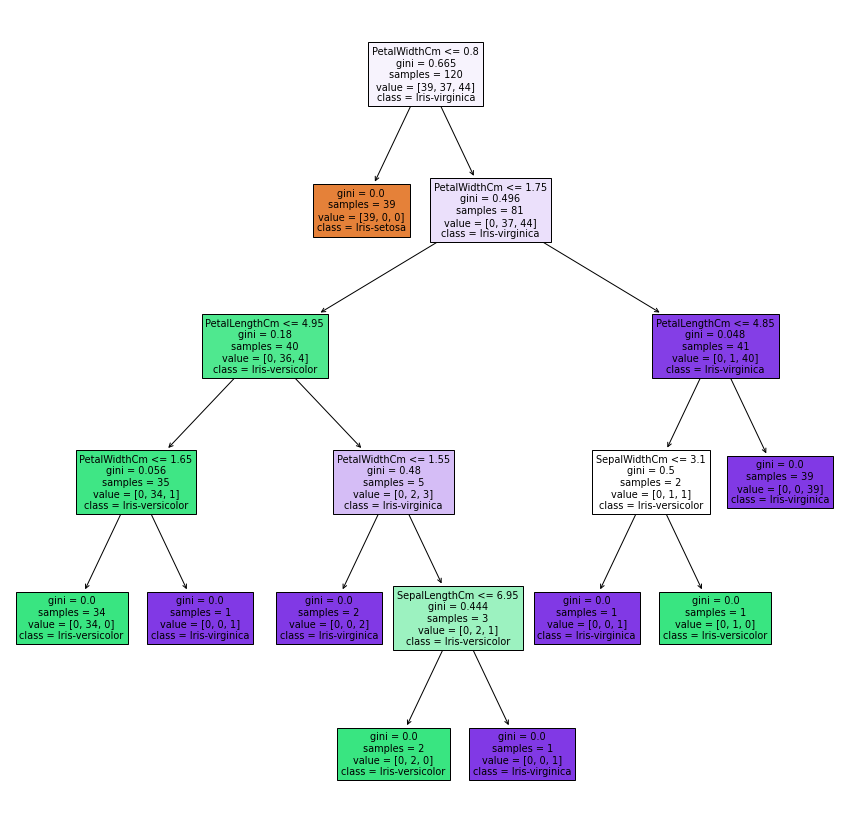

In [29]:
#Visualizing the Decision Tree
plt.figure(figsize = (15, 15))
plot_tree(treeModel,
         feature_names=X.columns,
         class_names=y.unique(),
         filled = True);

Predicting accuracy

In [23]:
print(classification_report(y_val, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



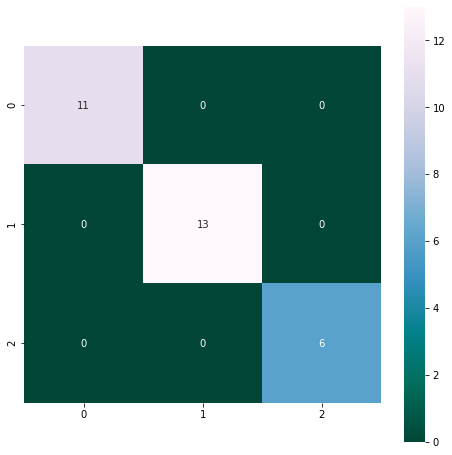

In [37]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_val, y_preds), annot = True, square = True, cmap='PuBuGn_r');